In [1]:
%matplotlib inline

In [38]:
# Tests laplacian, fourier and hough lines transform

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

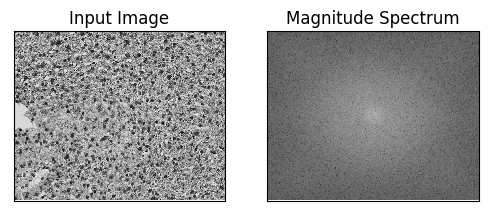

In [3]:
#http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/
#py_transforms/py_fourier_transform/py_fourier_transform.html#fourier-transform

#Function tests fourier transform

im = cv2.imread("../Images/GImage4.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(121), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])
plt.show()

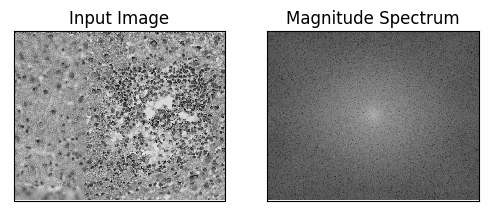

In [4]:
img = cv2.imread('../Images/Image14.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

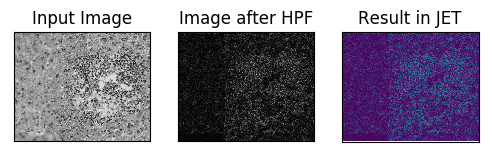

In [5]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

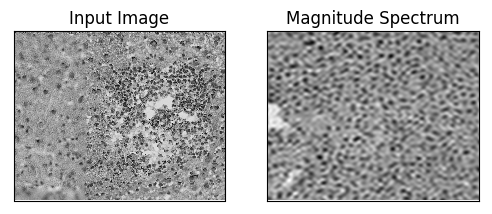

In [6]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

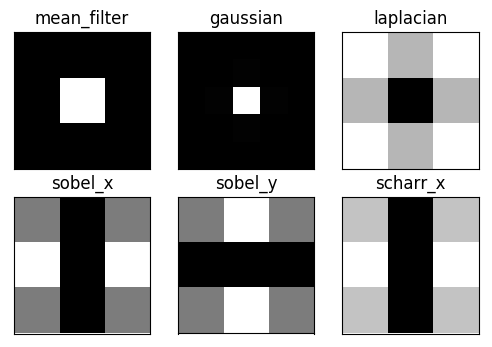

In [7]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

C:\Users\tzlab\Anaconda\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


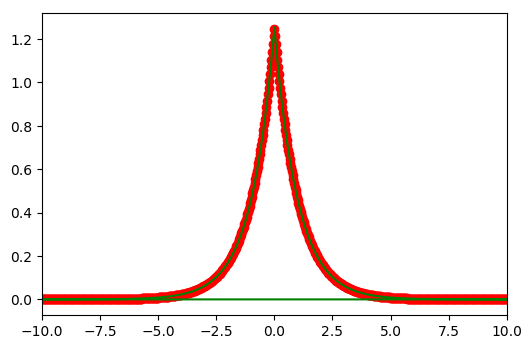

In [8]:
#stack overflow
t0 = -100
dt = 0.001
t = np.arange(t0, -t0, dt)
f = 1./(t**2+1.)
g = np.fft.fft(f)
w = np.fft.fftfreq(f.size)*2*np.pi/dt
g*=dt*np.exp(-complex(0,1)*w*t0)/(np.sqrt(2*np.pi))
plt.scatter(w,g,color='r')
plt.plot(w,np.exp(-np.abs(w))*np.sqrt(np.pi/2), color='g')
plt.gca().set_xlim(-10,10)
plt.show()
plt.close()

2467.6231644
2330.84908677


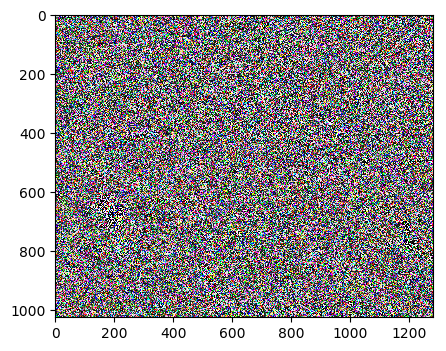

In [9]:
#Function tests Laplacian and Laplacian var

img = cv2.imread("../Images/GImage4.tif")
print(cv2.Laplacian(img, cv2.CV_64F).var())

image = cv2.imread("../Images/GImage5.tif")
print(cv2.Laplacian(image, cv2.CV_64F).var())

ary = cv2.Laplacian(image, cv2.CV_64F)
plt.imshow(ary)
plt.show()

In [10]:
#Haar wavelet

from math import *
N=8
res = [sin(k) for k in xrange(N)]
for k in xrange(N):
    print res[k]
    
print

def discreteHaarWaveletTransform(x):
    N = len(x)
    output = [0.0]*N
    length = N >> 1
    while True:
        for i in xrange(0,length):
            summ = x[i*2]+x[i*2+1]
            difference = x[i*2] - x[i*2+1]
            output[i]=summ
            output[length+i]=difference
            
        if length == 1:
            return output
        x = output[:length << 1]
        
        length >>=1
        
res = discreteHaarWaveletTransform(res)
for k in xrange(N):
    print res[k]

0.0
0.841470984808
0.909297426826
0.14112000806
-0.756802495308
-0.958924274663
-0.279415498199
0.656986598719

0.553732750242
3.23004408914
-0.208946450078
-2.09329787049
-0.841470984808
0.768177418766
0.202121779355
-0.936402096918


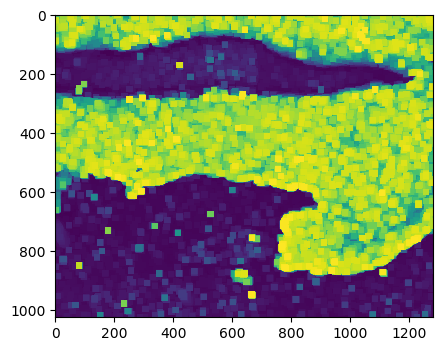

4


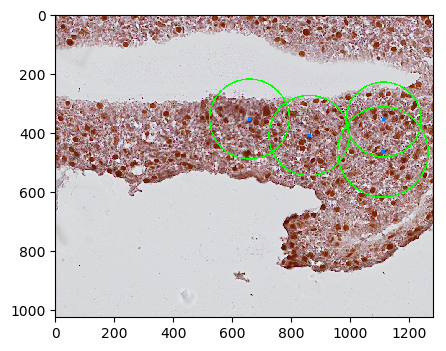

In [11]:
#Function tests erosion then Hough Circle 

im = cv2.imread("../Images/GImage12.tif")
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray)
#plt.show()

kernel = np.ones((5,5), np.uint8)
erosion=cv2.erode(gray, kernel, iterations=5)
#dilation = cv2.dilate(gray, kernel, iterations=25)
#blur = cv2.blur(gray, (5,5))

#edges = cv2.Canny(blur,20,40)
#plt.imshow(edges)
#plt.show()

gra=255-erosion
plt.imshow(gra)
plt.show()
circles = cv2.HoughCircles(gra, cv2.cv.CV_HOUGH_GRADIENT, 1, 20, param1 = 40, param2 = 130, minRadius = 0, maxRadius = 0)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x,y,r) in circles:
        cv2.circle(im, (x,y), r, (0,255,0), 4)
        cv2.rectangle(im, (x-5,y-5), (x+5, y+5), (0,128,255), -1)
print len(circles)        
plt.imshow(im)
plt.show()

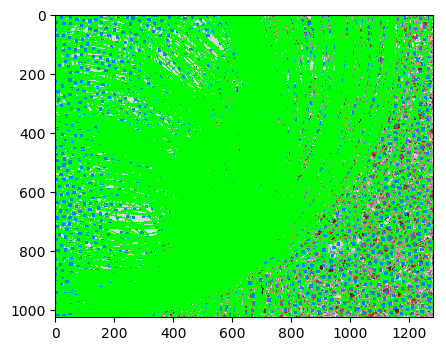

In [12]:
#Function tests converting to gray then Hough Circle

im = cv2.imread("../Images/Image7.tif")
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.cv.CV_HOUGH_GRADIENT, 1, 20, param1 = 50, param2 = 30, minRadius = 0, maxRadius = 0)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x,y,r) in circles:
        cv2.circle(im, (x,y), r, (0,255,0), 4)
        cv2.rectangle(im, (x-5,y-5), (x+5, y+5), (0,128,255), -1)
        
plt.imshow(im)
plt.show()

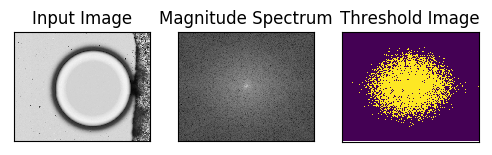

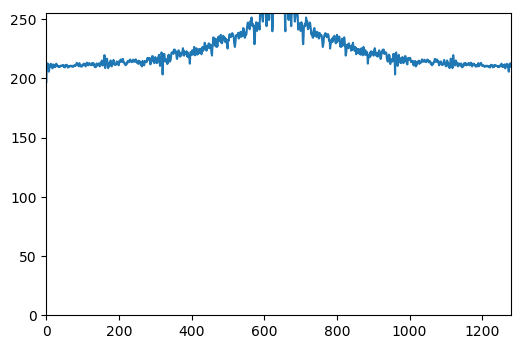

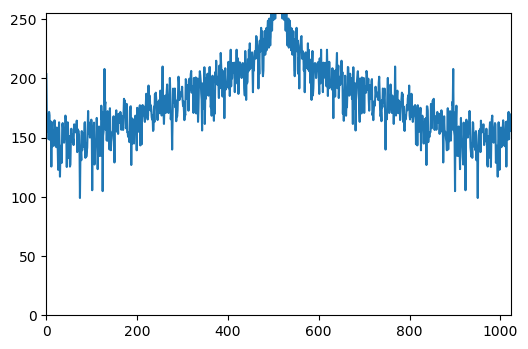

In [13]:
#Function tests fourier transform on bubbles

im = cv2.imread("../Images/Image46.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

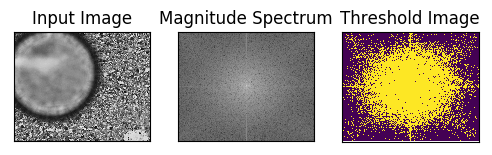

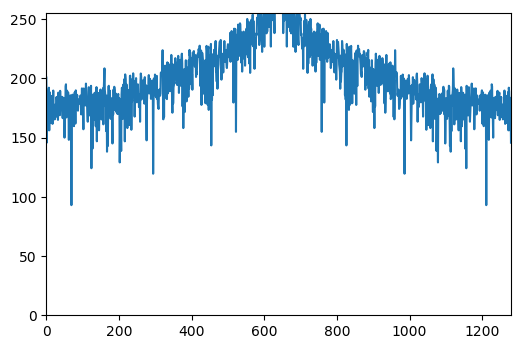

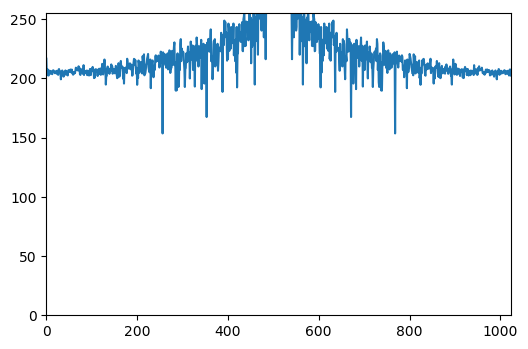

In [14]:
#Function tests fourier transform

im = cv2.imread("../Images/Image20.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

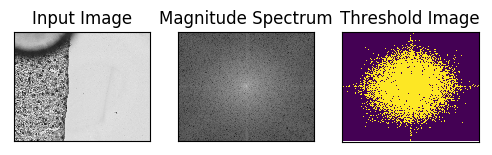

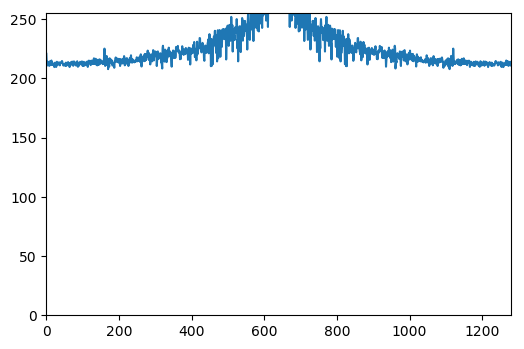

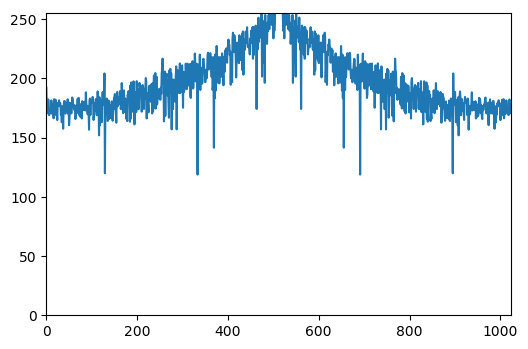

In [15]:
#Function tests fourier transform

im = cv2.imread("../Images/Image13.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

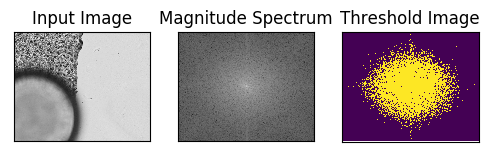

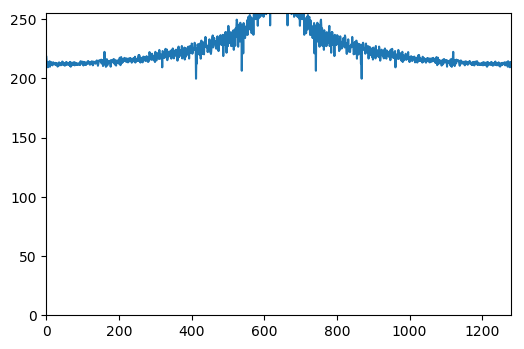

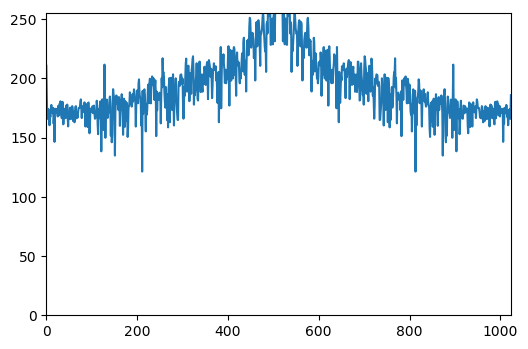

In [16]:
#Function tests fourier transform

im = cv2.imread("../Images/Image12.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

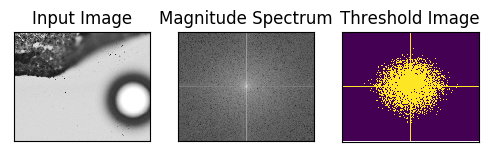

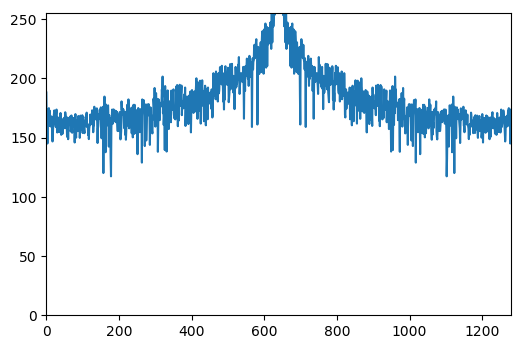

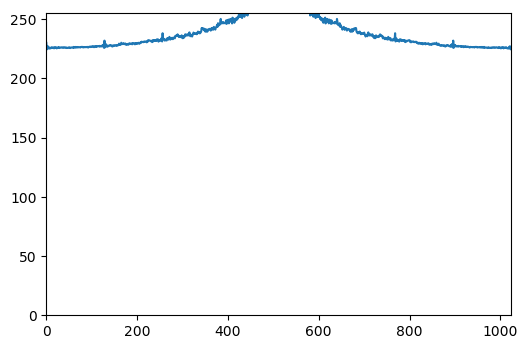

In [17]:
#Function tests fourier transform

im = cv2.imread("../Images/Image26.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

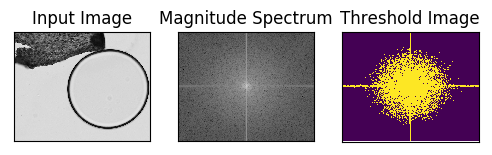

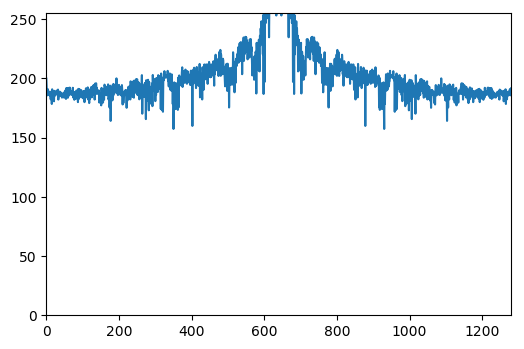

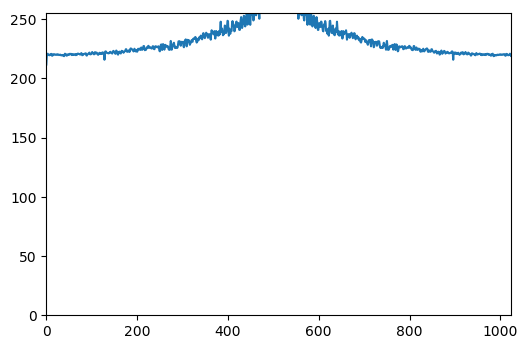

In [18]:
im = cv2.imread("../Images/Image40.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

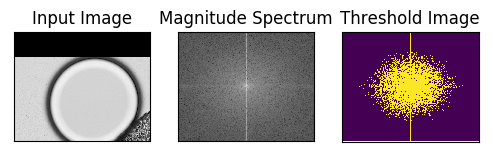

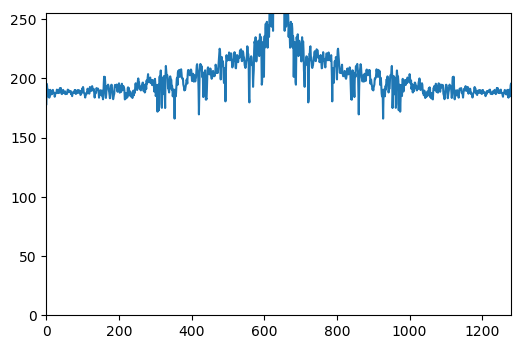

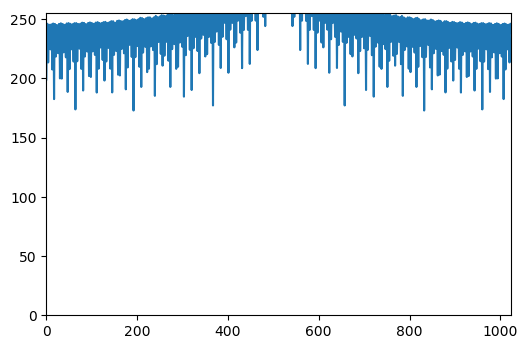

In [19]:
im = cv2.imread("../Images/Image41.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

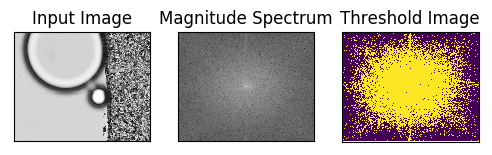

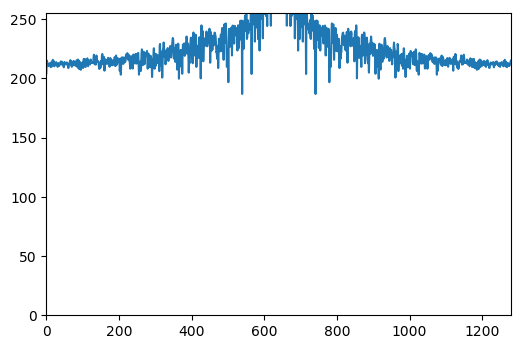

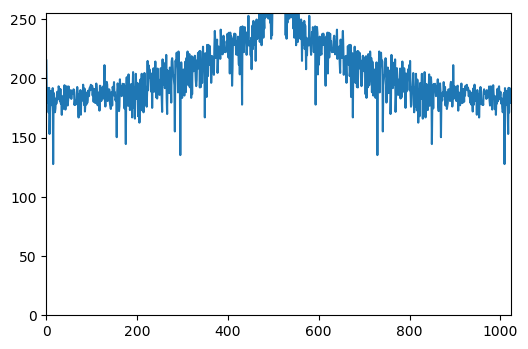

In [20]:
im = cv2.imread("../Images/Image42.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

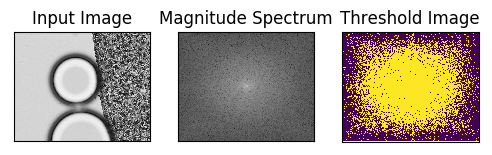

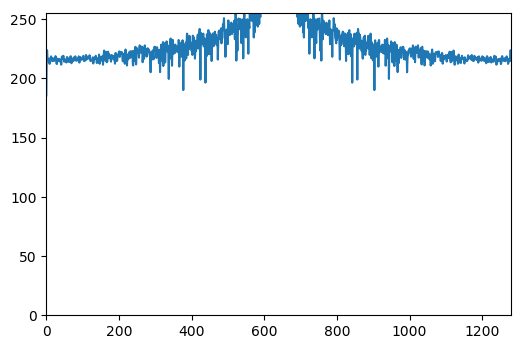

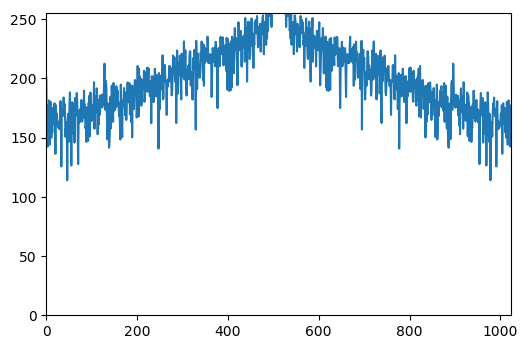

In [21]:
im = cv2.imread("../Images/Image43.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

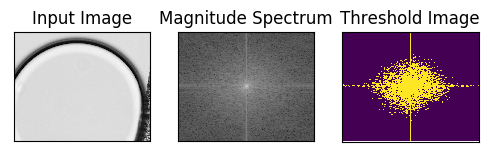

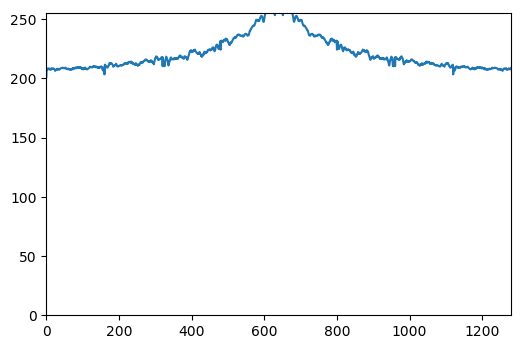

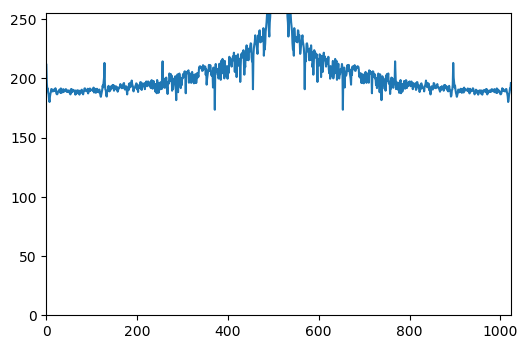

In [22]:
im = cv2.imread("../Images/Image44.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

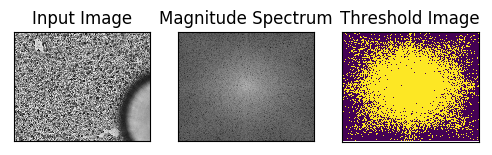

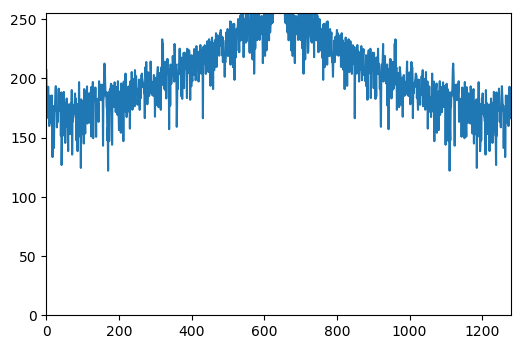

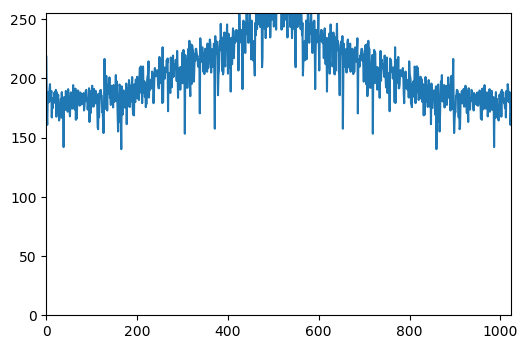

In [23]:
im = cv2.imread("../Images/Image11.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

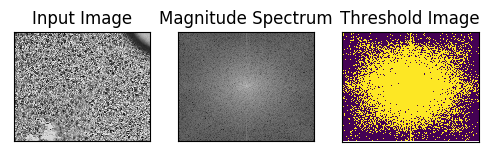

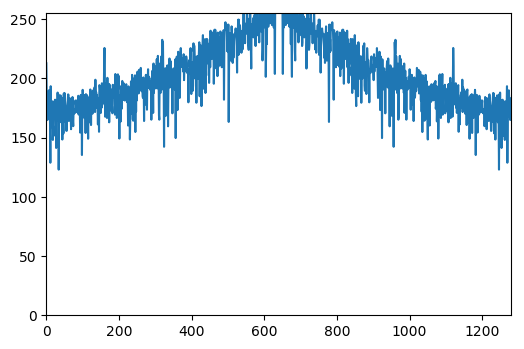

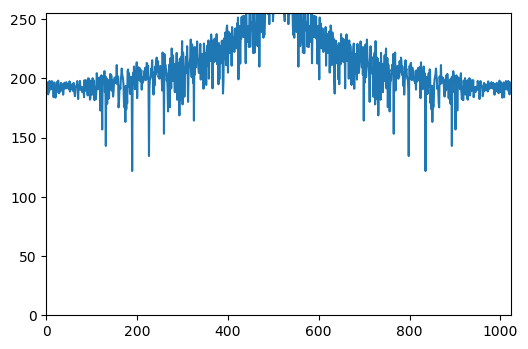

In [24]:
im = cv2.imread("../Images/Image10.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

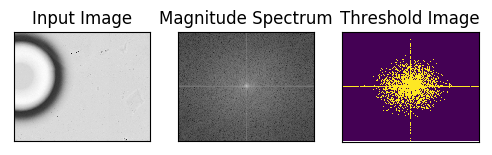

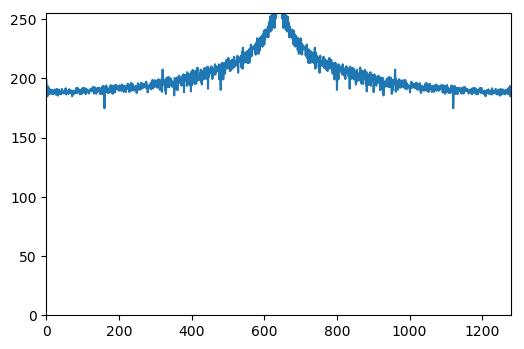

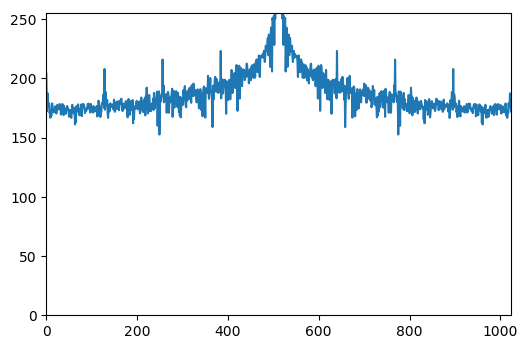

In [25]:
im = cv2.imread("../Images/Image9.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

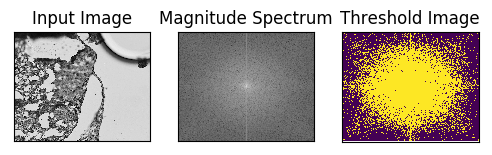

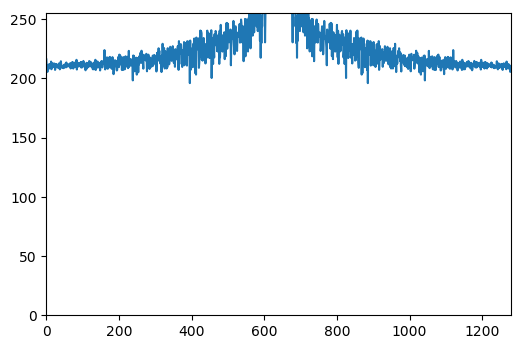

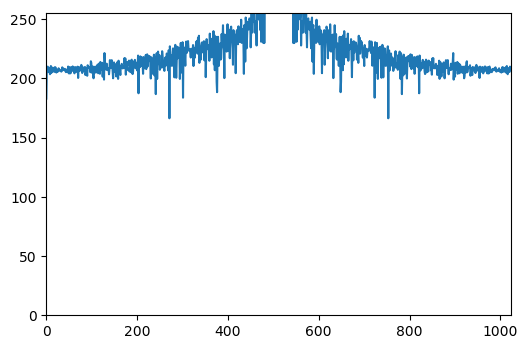

In [26]:
im = cv2.imread("../Images/Image21.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

row = []
#fixed row
for i in range(magnitude_s.shape[1]):
    row.append(magnitude_s[512,i])
plt.plot(row)
plt.axis([0,magnitude_s.shape[1],0,255])
plt.show()

column = []
#fixed row
for i in range(magnitude_s.shape[0]):
    column.append(magnitude_s[i,640])
plt.plot(column)
plt.axis([0,magnitude_s.shape[0],0,255])
plt.show()

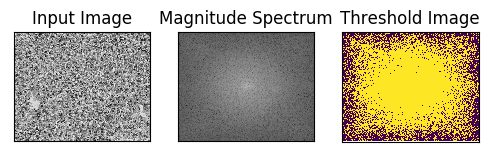

In [27]:
#Good Images, No Bubbles
#Trying to see results of magnitude spectrum

im = cv2.imread("../Images/GImage5.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

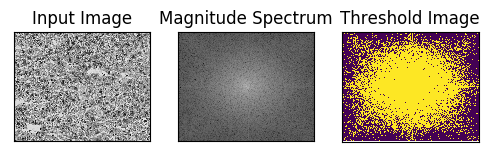

In [28]:
im = cv2.imread("../Images/GImage8.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

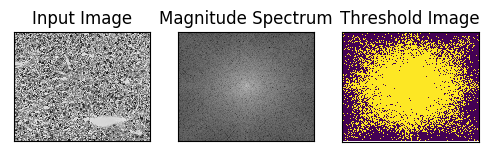

In [29]:
im = cv2.imread("../Images/GImage18.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

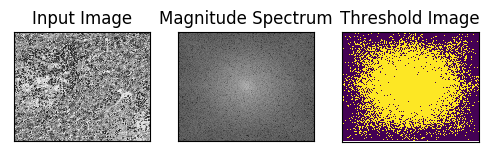

In [30]:
im = cv2.imread("../Images/GImage21.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

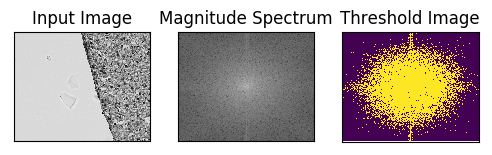

In [31]:
im = cv2.imread("../Images/GImage16.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

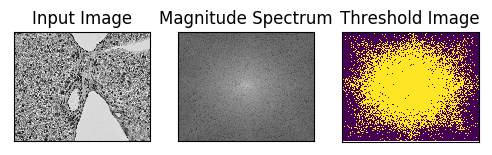

In [32]:
im = cv2.imread("../Images/GImage10.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

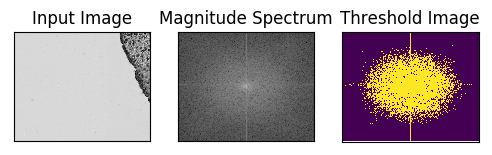

In [33]:
im = cv2.imread("../Images/GImage.tif", 0)
dft = cv2.dft(np.float32(im), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(131), plt.imshow(im, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])

ret,t1 = cv2.threshold(magnitude_s,175,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(t1)
plt.title("Threshold Image"), plt.xticks([]), plt.yticks([])
plt.show()

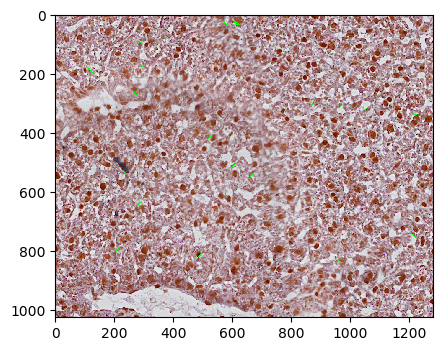

In [34]:
img = cv2.imread("../Images/GImage17.tif")
dst = cv2.Canny(img, 50,200,3)

lines = cv2.HoughLinesP(dst, 1, np.pi/180, 100, 100, 10)
if lines is not None:
    for x1, y1, x2, y2 in lines[0]:
        cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)

plt.imshow(img)
plt.show()

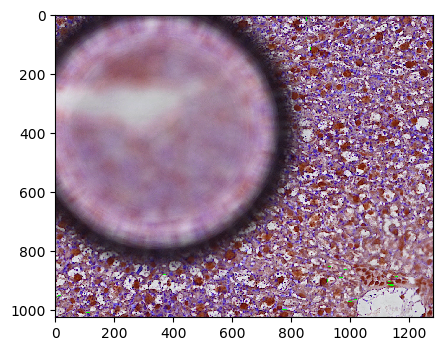

In [35]:
img = cv2.imread("../Images/Image20.tif")
dst = cv2.Canny(img, 50,200,3)

lines = cv2.HoughLinesP(dst, 1, np.pi/180, 100, 100, 10)
if lines is not None:
    for x1, y1, x2, y2 in lines[0]:
        cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)

plt.imshow(img)
plt.show()

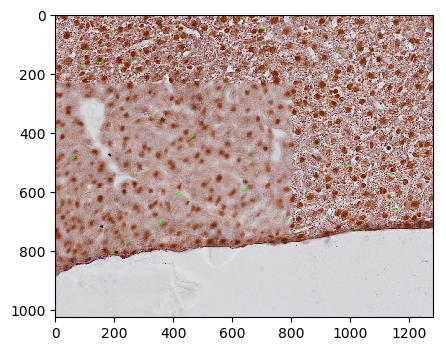

In [36]:
img = cv2.imread("../Images/Image2.tif")
dst = cv2.Canny(img, 50,200,3)

lines = cv2.HoughLinesP(dst, 1, np.pi/180, 100, 100, 10)
if lines is not None:
    for x1, y1, x2, y2 in lines[0]:
        cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)

plt.imshow(img)
plt.show()

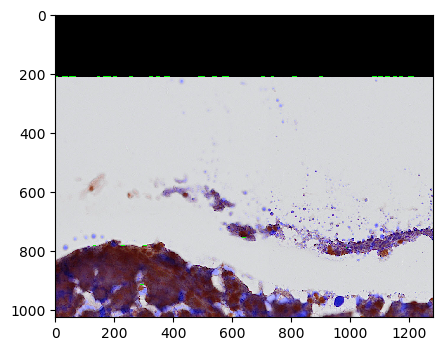

In [37]:
img = cv2.imread("../Images/Image15.tif")
dst = cv2.Canny(img, 50,200,3)

lines = cv2.HoughLinesP(dst, 1, np.pi/180, 100, 100, 10)
if lines is not None:
    for x1, y1, x2, y2 in lines[0]:
        cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)

plt.imshow(img)
plt.show()